In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
data = pd.read_csv("data/NYPD_Complaint_Data_Historic.csv")
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,700381962,05/28/2015,15:00:00,NaN,NaN,46.0,06/01/2015,578.0,HARRASSMENT 2,638.0,...,M,NaN,40.845868,-73.915888,"(40.84586773, -73.915888033)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
1,642234217,10/28/2013,13:50:00,10/28/2013,13:50:00,120.0,10/28/2013,351.0,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,NaN,40.627061,-74.077149,"(40.627060894, -74.077149232)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M
2,242465164,05/09/2012,20:50:00,05/09/2012,21:00:00,24.0,05/09/2012,236.0,DANGEROUS WEAPONS,782.0,...,NaN,NaN,40.800966,-73.969047,"(40.800965968, -73.969047272)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E
3,927207428,01/03/2014,13:30:00,01/03/2014,13:35:00,108.0,01/03/2014,109.0,GRAND LARCENY,409.0,...,M,NaN,40.745242,-73.894253,"(40.745241809, -73.894253382)",PATROL BORO QUEENS NORTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,M
4,492142357,04/13/2016,00:00:00,NaN,NaN,40.0,04/13/2016,351.0,CRIMINAL MISCHIEF & RELATED OF,258.0,...,NaN,NaN,40.810352,-73.924942,"(40.810351863, -73.924942326)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E


In [26]:
print(data.isnull().sum())
total_na_values = data.isnull().sum().sum()
print("Total number of missing values: {}".format(total_na_values))

CMPLNT_NUM                 0
CMPLNT_FR_DT              67
CMPLNT_FR_TM               4
CMPLNT_TO_DT          333094
CMPLNT_TO_TM          332353
ADDR_PCT_CD              301
RPT_DT                     4
KY_CD                      4
OFNS_DESC               2943
PD_CD                   1822
PD_DESC                 1822
CRM_ATPT_CPTD_CD           5
LAW_CAT_CD                 4
BORO_NM                 1886
LOC_OF_OCCUR_DESC     358839
PREM_TYP_DESC           8465
JURIS_DESC                 4
JURISDICTION_CODE       1822
PARKS_NM             1754996
HADEVELOPT           1680048
HOUSING_PSA          1632363
X_COORD_CD              5386
Y_COORD_CD              5386
SUSP_AGE_GROUP        912569
SUSP_RACE             671395
SUSP_SEX              671719
TRANSIT_DISTRICT     1724338
Latitude                5386
Longitude               5386
Lat_Lon                 5386
PATROL_BORO             1913
STATION_NAME         1724338
VIC_AGE_GROUP         271498
VIC_RACE                  21
VIC_SEX       

In [27]:
data.describe()

,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,1.765931e+06,1.766228e+06,1.764410e+06,1.764410e+06,1.760846e+06,1.760846e+06,41894.000000,1.760846e+06,1.760846e+06
mean,6.307106e+01,2.975526e+02,4.098599e+02,8.014146e-01,1.005038e+06,2.073390e+05,13.428964,4.073573e+01,-7.392496e+01
std,3.460790e+01,1.519195e+02,2.187282e+02,7.236646e+00,2.136537e+04,3.055795e+04,12.323076,8.386972e-02,7.705234e-02
min,-9.900000e+01,1.010000e+02,1.000000e+02,0.000000e+00,1.926690e+05,1.211310e+05,1.000000,4.049891e+01,-7.685360e+01
25%,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,9.918560e+05,1.845780e+05,3.000000,4.067325e+01,-7.397258e+01
50%,6.300000e+01,3.410000e+02,3.570000e+02,0.000000e+00,1.004563e+06,2.063350e+05,11.000000,4.073294e+01,-7.392669e+01
75%,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,1.016705e+06,2.352320e+05,30.000000,4.081231e+01,-7.388283e+01
max,1.230000e+02,8.810000e+02,9.690000e+02,9.700000e+01,1.067226e+06,4.242486e+06,34.000000,5.173171e+01,-7.370057e+01


In [42]:
new_data = data.drop(["CMPLNT_NUM","CMPLNT_TO_DT","CMPLNT_FR_TM","CMPLNT_TO_TM","CMPLNT_FR_DT","KY_CD","TRANSIT_DISTRICT","PD_CD","PD_DESC","CRM_ATPT_CPTD_CD","HADEVELOPT","PARKS_NM","HOUSING_PSA","X_COORD_CD","Y_COORD_CD","PATROL_BORO","STATION_NAME","JURISDICTION_CODE","Lat_Lon"], axis=1)

In [43]:
new_data.head()

,ADDR_PCT_CD,RPT_DT,OFNS_DESC,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,46.0,06/01/2015,HARRASSMENT 2,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,25-44,BLACK,M,40.845868,-73.915888,25-44,WHITE HISPANIC,F
1,120.0,10/28/2013,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,STATEN ISLAND,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NaN,NaN,NaN,40.627061,-74.077149,45-64,WHITE,M
2,24.0,05/09/2012,DANGEROUS WEAPONS,MISDEMEANOR,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,40.800966,-73.969047,NaN,UNKNOWN,E
3,108.0,01/03/2014,GRAND LARCENY,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NaN,UNKNOWN,M,40.745242,-73.894253,45-64,ASIAN / PACIFIC ISLANDER,M
4,40.0,04/13/2016,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,BRONX,NaN,HIGHWAY/PARKWAY,N.Y. POLICE DEPT,NaN,NaN,NaN,40.810352,-73.924942,UNKNOWN,UNKNOWN,E


In [46]:
print(new_data.describe())
print(new_data.info())

        ADDR_PCT_CD      Latitude     Longitude
count  1.765931e+06  1.760846e+06  1.760846e+06
mean   6.307106e+01  4.073573e+01 -7.392496e+01
std    3.460790e+01  8.386972e-02  7.705234e-02
min   -9.900000e+01  4.049891e+01 -7.685360e+01
25%    4.000000e+01  4.067325e+01 -7.397258e+01
50%    6.300000e+01  4.073294e+01 -7.392669e+01
75%    9.400000e+01  4.081231e+01 -7.388283e+01
max    1.230000e+02  5.173171e+01 -7.370057e+01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766232 entries, 0 to 1766231
Data columns (total 16 columns):
ADDR_PCT_CD          float64
RPT_DT               object
OFNS_DESC            object
LAW_CAT_CD           object
BORO_NM              object
LOC_OF_OCCUR_DESC    object
PREM_TYP_DESC        object
JURIS_DESC           object
SUSP_AGE_GROUP       object
SUSP_RACE            object
SUSP_SEX             object
Latitude             float64
Longitude            float64
VIC_AGE_GROUP        object
VIC_RACE             object
VIC_SEX              object
dtyp

In [50]:
new_data.isna().sum()

ADDR_PCT_CD             301
RPT_DT                    4
OFNS_DESC              2943
LAW_CAT_CD                4
BORO_NM                1886
LOC_OF_OCCUR_DESC    358839
PREM_TYP_DESC          8465
JURIS_DESC                4
SUSP_AGE_GROUP       912569
SUSP_RACE            671395
SUSP_SEX             671719
Latitude               5386
Longitude              5386
VIC_AGE_GROUP        271498
VIC_RACE                 21
VIC_SEX                  21
dtype: int64

In [52]:
new_data = new_data[new_data['RPT_DT'].notna()]

In [53]:
date = new_data["RPT_DT"].str.split("/", n = 3, expand = True)
new_data['year'] = date[2].astype('int32')
new_data['day'] = date[1].astype('int32')
new_data['month'] = date[0].astype('int32')

In [54]:
new_data.head()

,ADDR_PCT_CD,RPT_DT,OFNS_DESC,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,day,month
0,46.0,06/01/2015,HARRASSMENT 2,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,25-44,BLACK,M,40.845868,-73.915888,25-44,WHITE HISPANIC,F,2015,1,6
1,120.0,10/28/2013,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,STATEN ISLAND,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NaN,NaN,NaN,40.627061,-74.077149,45-64,WHITE,M,2013,28,10
2,24.0,05/09/2012,DANGEROUS WEAPONS,MISDEMEANOR,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,40.800966,-73.969047,NaN,UNKNOWN,E,2012,9,5
3,108.0,01/03/2014,GRAND LARCENY,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NaN,UNKNOWN,M,40.745242,-73.894253,45-64,ASIAN / PACIFIC ISLANDER,M,2014,3,1
4,40.0,04/13/2016,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,BRONX,NaN,HIGHWAY/PARKWAY,N.Y. POLICE DEPT,NaN,NaN,NaN,40.810352,-73.924942,UNKNOWN,UNKNOWN,E,2016,13,4


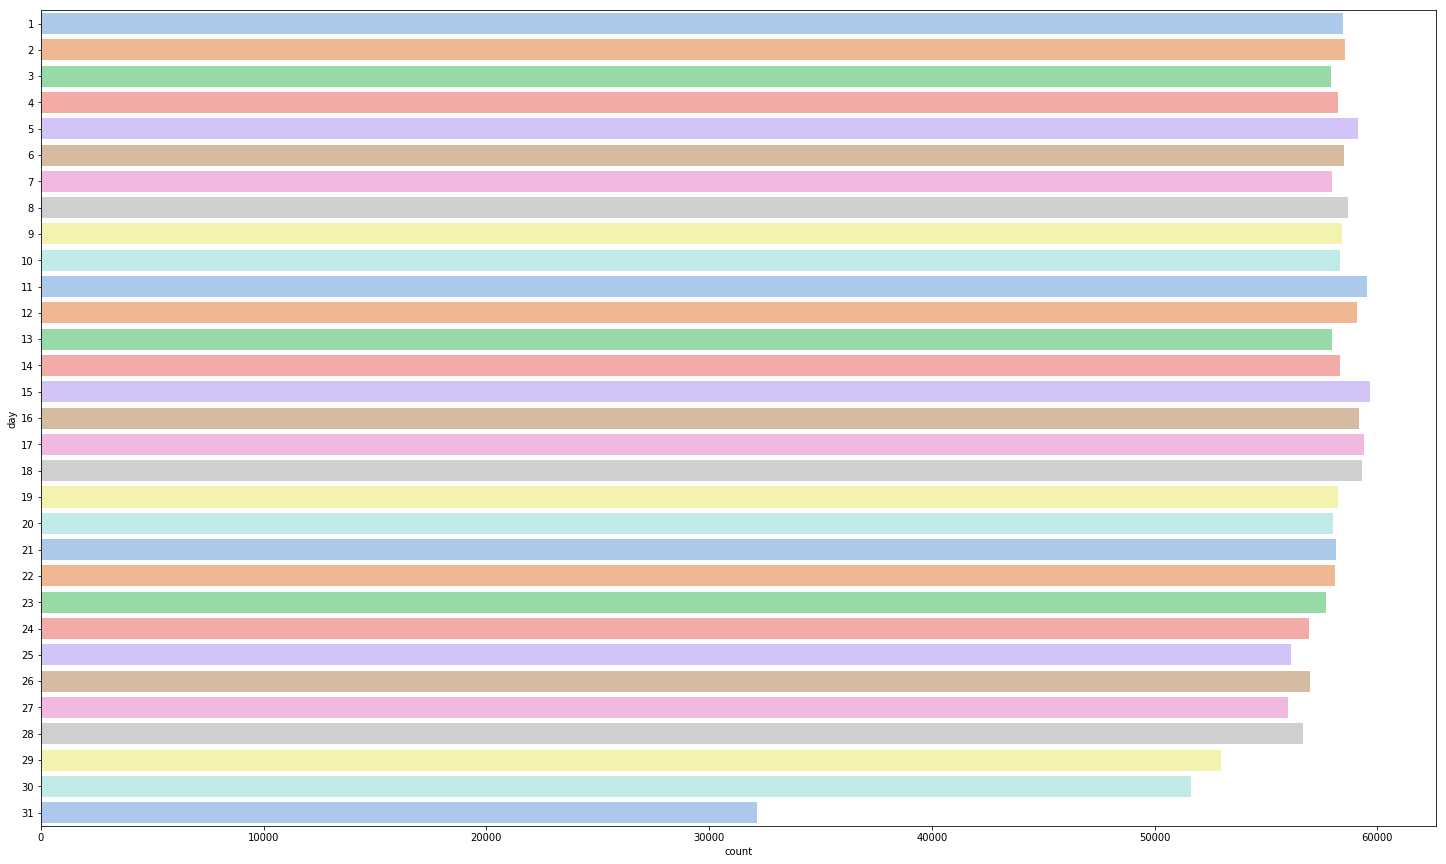

In [60]:
import seaborn as sns

f, ax = plt.subplots(figsize=(25, 15))
sns.countplot(y="day", data=new_data, palette="pastel")

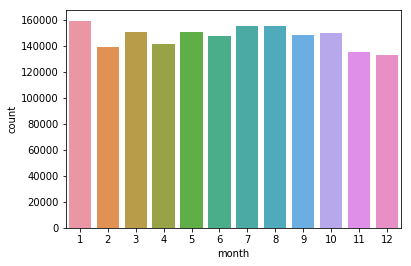

In [62]:
sns.countplot(x="month", data=new_data)

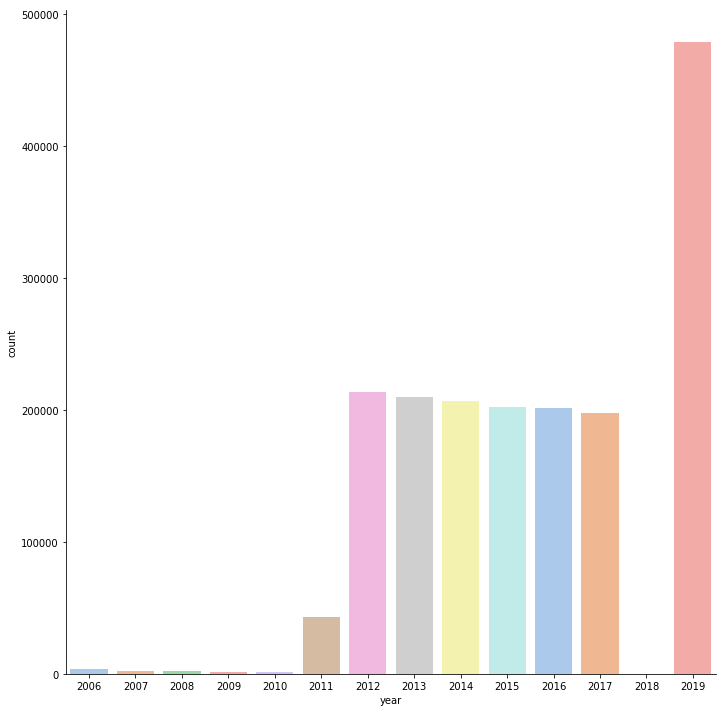

In [83]:
sns.catplot(x="year", data=new_data,kind="count", palette="pastel", height=10, aspect=1)

In [64]:
new_data[['SUSP_RACE']] = new_data[['SUSP_RACE']].fillna(value="UNKNOWN")

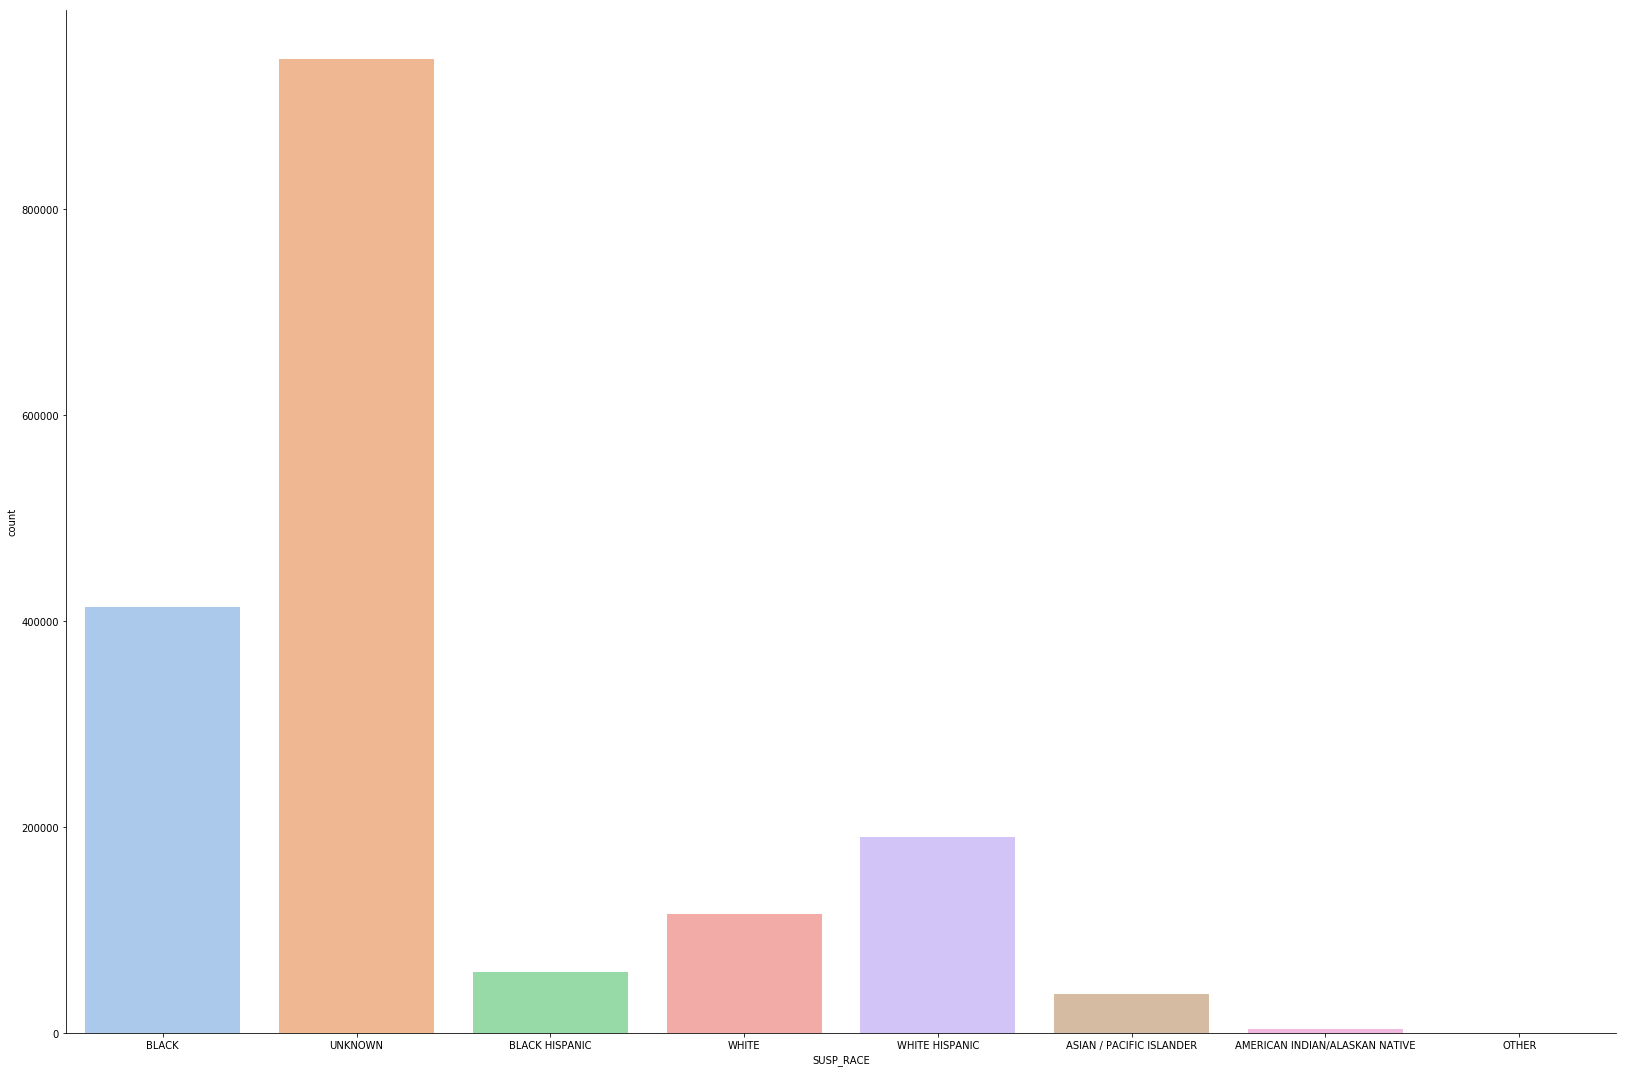

In [72]:
sns.catplot(x="SUSP_RACE", data=new_data,kind="count", palette="pastel", height=15, aspect=1.5)

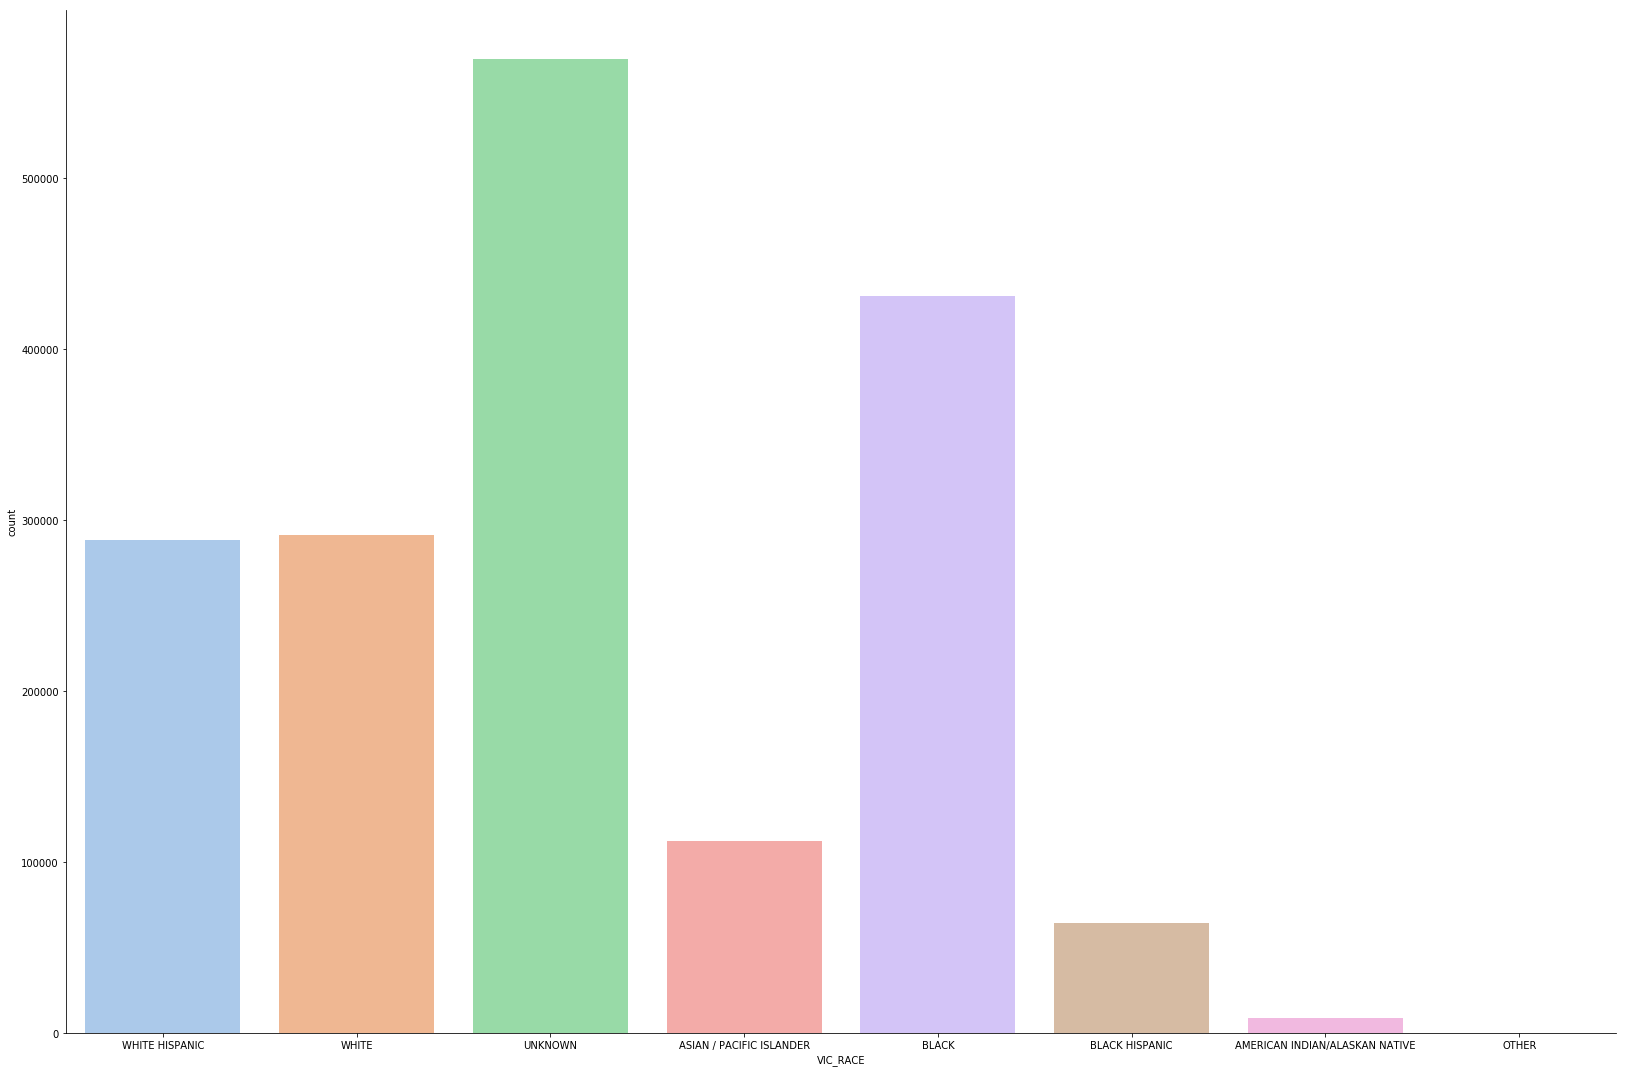

In [73]:
new_data[['VIC_RACE']] = new_data[['VIC_RACE']].fillna(value="UNKNOWN")
sns.catplot(x="VIC_RACE", data=new_data,kind="count", palette="pastel", height=15, aspect=1.5)

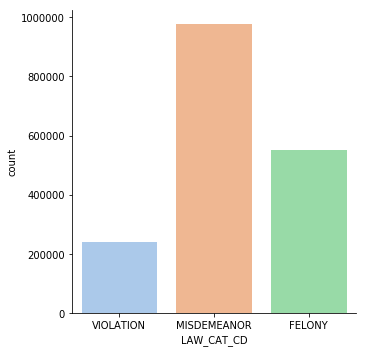

In [88]:
new_data = new_data[new_data['LAW_CAT_CD'].notna()]
sns.catplot(x="LAW_CAT_CD", data=new_data,kind="count", palette="pastel")  

In [98]:
new_data.loc[new_data['OFNS_DESC'].isna(), 'LAW_CAT_CD'].value_counts()


MISDEMEANOR    2791
FELONY          144
VIOLATION         4
Name: LAW_CAT_CD, dtype: int64